Primero Cargar las librerias que se usarán

In [62]:
import pandas as pd
import seaborn as sns
import plotly.express as pl
import matplotlib.pyplot as plt

In [2]:
#Preprocesado y métedos
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Clasificadores

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

Cargamos el dataset obtenido de kaggle (https://www.kaggle.com/datasets/shivam2503/diamonds)

In [3]:
diamantes = pd.read_csv("diamantes/diamonds.csv")
diamantes.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  4.05  2.39

Las columnas del dataset

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

In [4]:
diamantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamantitos = diamantes.copy()

In [7]:
#Prueba para standarizar los datos

scaler = StandardScaler()
diamantitos = scaler.fit_transform(diamantitos[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])


In [6]:
#Añadir nuevas filas categorias/numericas mediante LabelEnconder

lb_enc = preprocessing.LabelEncoder()
diamantes["corte"] = lb_enc.fit_transform(diamantes["cut"])
diamantes["colores"] = lb_enc.fit_transform(diamantes["color"])
diamantes["claridad"] = lb_enc.fit_transform(diamantes["clarity"])
diamantes.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  corte  colores  claridad  
0  2.43      2        1         3  
1  2.31      3        1         2  
2  2.31      1        1         4  
3  2.63      3        5         5  
4  2.75      1        6         3

In [7]:
diamantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
 11  corte       53940 non-null  int32  
 12  colores     53940 non-null  int32  
 13  claridad    53940 non-null  int32  
dtypes: float64(6), int32(3), int64(2), object(3)
memory usage: 5.1+ MB


Breve EDA con:
* Un .describe()
* Comprobación de la correlación de las columnas.
* Gráficos para ver la variable corte con otras columnas.

In [8]:
diamantes.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z         corte       colores  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       5.731157      5.734526      3.538734      2.553003      2.594197   
std        1.121761      1.142135      0.705699      1.027708      1.701105   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.710000      4.720000      2.910000      2.000000      1.000000   
50%        5.700000      5.710000      3.530000      2.000000      3.000000   
75%        6.540000      6.540000      4.040000      3.000000      4.000000   
max       10.740000     58.900000     31.800000      4.000000      6.000000   

           claridad  
count  53940.000000  
mean       3.835150  
std        1.724591  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        5.000000  
max        7.000000

In [9]:
diamantes.corr()

Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.377983 -0.034800 -0.100830 -0.306873 -0.405440   
carat        -0.377983  1.000000  0.028224  0.181618  0.921591  0.975094   
depth        -0.034800  0.028224  1.000000 -0.295779 -0.010647 -0.025289   
table        -0.100830  0.181618 -0.295779  1.000000  0.127134  0.195344   
price        -0.306873  0.921591 -0.010647  0.127134  1.000000  0.884435   
x            -0.405440  0.975094 -0.025289  0.195344  0.884435  1.000000   
y            -0.395843  0.951722 -0.029341  0.183760  0.865421  0.974701   
z            -0.399208  0.953387  0.094924  0.150929  0.861249  0.970772   
corte        -0.023327  0.017124 -0.194249  0.150327  0.039860  0.022342   
colores      -0.095098  0.291437  0.047279  0.026465  0.172511  0.270287   
claridad      0.125136 -0.214290 -0.053080 -0.088223 -0.071535 -0.225721   

                   y         z     corte   colores  claridad  
Unnamed: 0 -0.395843 -0.399208 -0.023327 -0.095098  0.125136  
carat       0.951722  0.953387  0.017124  0.291437 -0.214290  
depth      -0.029341  0.094924 -0.194249  0.047279 -0.053080  
table       0.183760  0.150929  0.150327  0.026465 -0.088223  
price       0.865421  0.861249  0.039860  0.172511 -0.071535  
x           0.974701  0.970772  0.022342  0.270287 -0.225721  
y           1.000000  0.952006  0.027572  0.263584 -0.217616  
z           0.952006  1.000000  0.002037  0.268227 -0.224263  
corte       0.027572  0.002037  1.000000  0.000304  0.028235  
colores     0.263584  0.268227  0.000304  1.000000 -0.027795  
claridad   -0.217616 -0.224263  0.028235 -0.027795  1.000000

<AxesSubplot:>

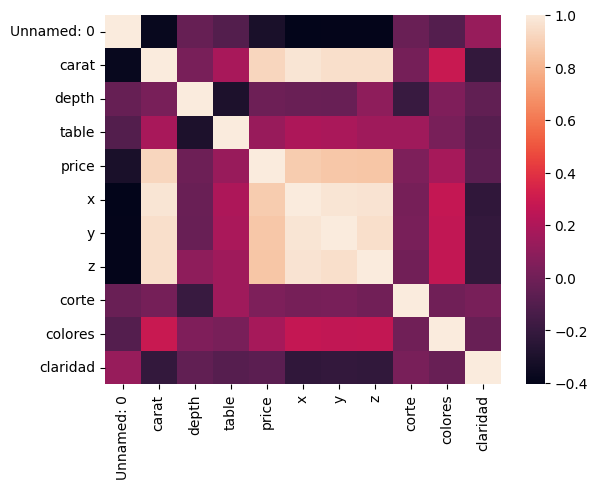

In [10]:
sns.heatmap(diamantes.corr())

<AxesSubplot:xlabel='price', ylabel='carat'>

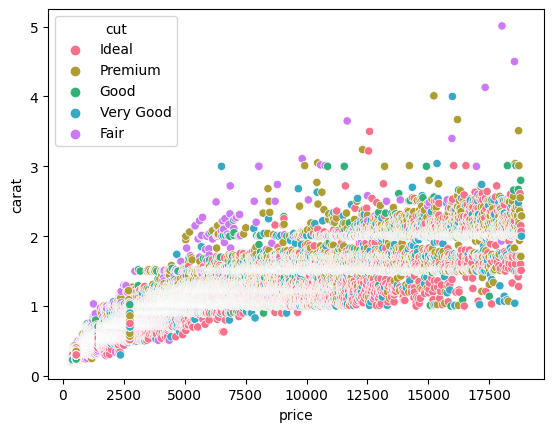

In [16]:
sns.scatterplot(x= diamantes["price"],
                y = diamantes["carat"],
                hue= diamantes["cut"],
                palette="husl")

In [63]:
fig = pl.scatter(diamantes,
                  x= diamantes["price"],
                  y = diamantes["carat"],
                  size="claridad",
                  color="cut",
                  log_x=False, size_max=20)
fig.show()

In [13]:
diamantes.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'corte', 'colores', 'claridad'],
      dtype='object')

Con un random forest vamos a ver cuales son las columnas más significativas y así tener criterio sobre ellas a la hora de trabajar.

In [14]:
#Preparar los datos para un feature_importances_

X = diamantes[['carat', 'colores', 'claridad', 'depth', 'table', 'price', 'x', 'y', 'z']]
y = diamantes["cut"]

#Separar en grupos

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15691)

In [15]:
rnd_forest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=15691)
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=15691)

In [16]:
importancias = rnd_forest.feature_importances_
importancias

array([2.54872384e-02, 5.18147183e-04, 3.55567493e-03, 3.24961084e-01,
       5.62537680e-01, 8.62216792e-03, 3.47637144e-02, 1.85218226e-02,
       2.10324705e-02])

In [18]:
#juntamos los resultados con las etiquetas y sacamos una minitabla para ver mejor los resultados

df_imp = pd.DataFrame({"Columnas": ['carat', 'colores', 'claridad', 'depth', 'table', 'price', 'x', 'y', 'z'],
                      "Relevancia": [2.54872384e-02, 5.18147183e-04, 3.55567493e-03, 3.24961084e-01, 5.62537680e-01, 8.62216792e-03, 3.47637144e-02, 1.85218226e-02, 2.10324705e-02]})
df_imp

Columnas  Relevancia
0     carat    0.025487
1   colores    0.000518
2  claridad    0.003556
3     depth    0.324961
4     table    0.562538
5     price    0.008622
6         x    0.034764
7         y    0.018522
8         z    0.021032

Elegimos las columnas más relevantes del random forest y las del negocio (precio y peso)

Con estas columnas y nuestro target (el corte) trabajaremos con los modelos de ML

In [19]:
diamantes_importancias = pd.DataFrame(diamantes[["cut", 'carat', 'depth', 'table', 'price', 'x']])
diamantes_importancias.head()

cut  carat  depth  table  price     x
0    Ideal   0.23   61.5   55.0    326  3.95
1  Premium   0.21   59.8   61.0    326  3.89
2     Good   0.23   56.9   65.0    327  4.05
3  Premium   0.29   62.4   58.0    334  4.20
4     Good   0.31   63.3   58.0    335  4.34

In [20]:
diamantes_importancias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cut     53940 non-null  object 
 1   carat   53940 non-null  float64
 2   depth   53940 non-null  float64
 3   table   53940 non-null  float64
 4   price   53940 non-null  int64  
 5   x       53940 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ MB


Otro breve EDA para ver las correlaciones y dos pairplot

In [21]:
diamantes_importancias.corr()

carat     depth     table     price         x
carat  1.000000  0.028224  0.181618  0.921591  0.975094
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289
table  0.181618 -0.295779  1.000000  0.127134  0.195344
price  0.921591 -0.010647  0.127134  1.000000  0.884435
x      0.975094 -0.025289  0.195344  0.884435  1.000000

<AxesSubplot:>

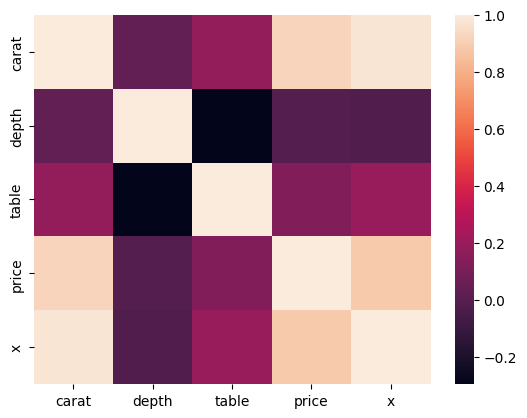

In [22]:
sns.heatmap(diamantes_importancias.corr())

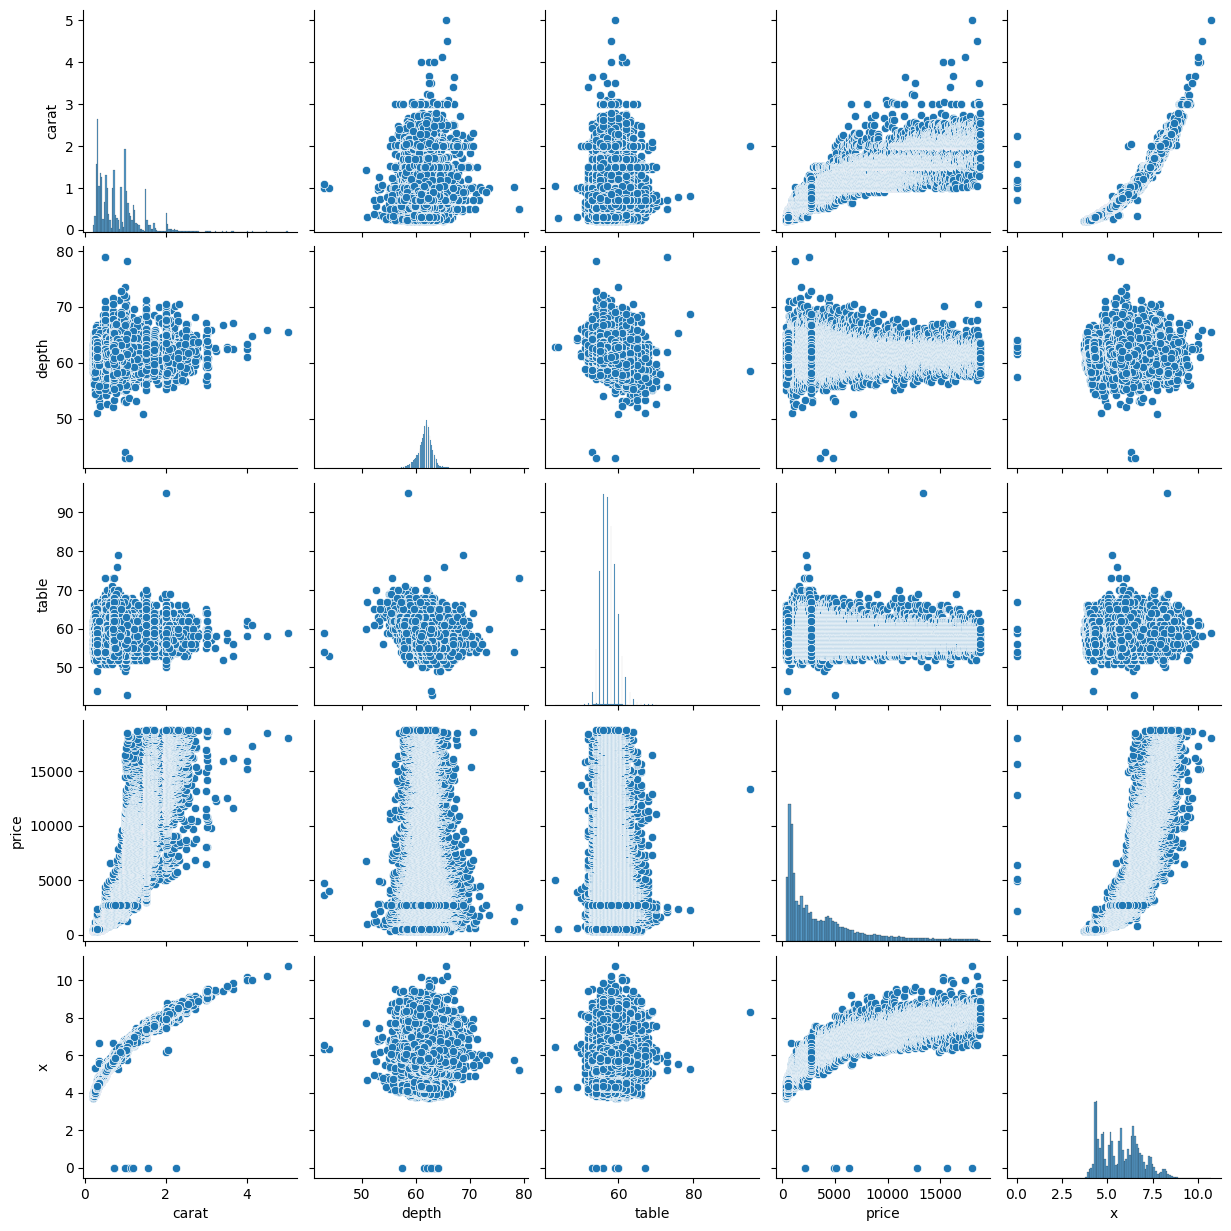

In [23]:
sns.pairplot(diamantes_importancias)

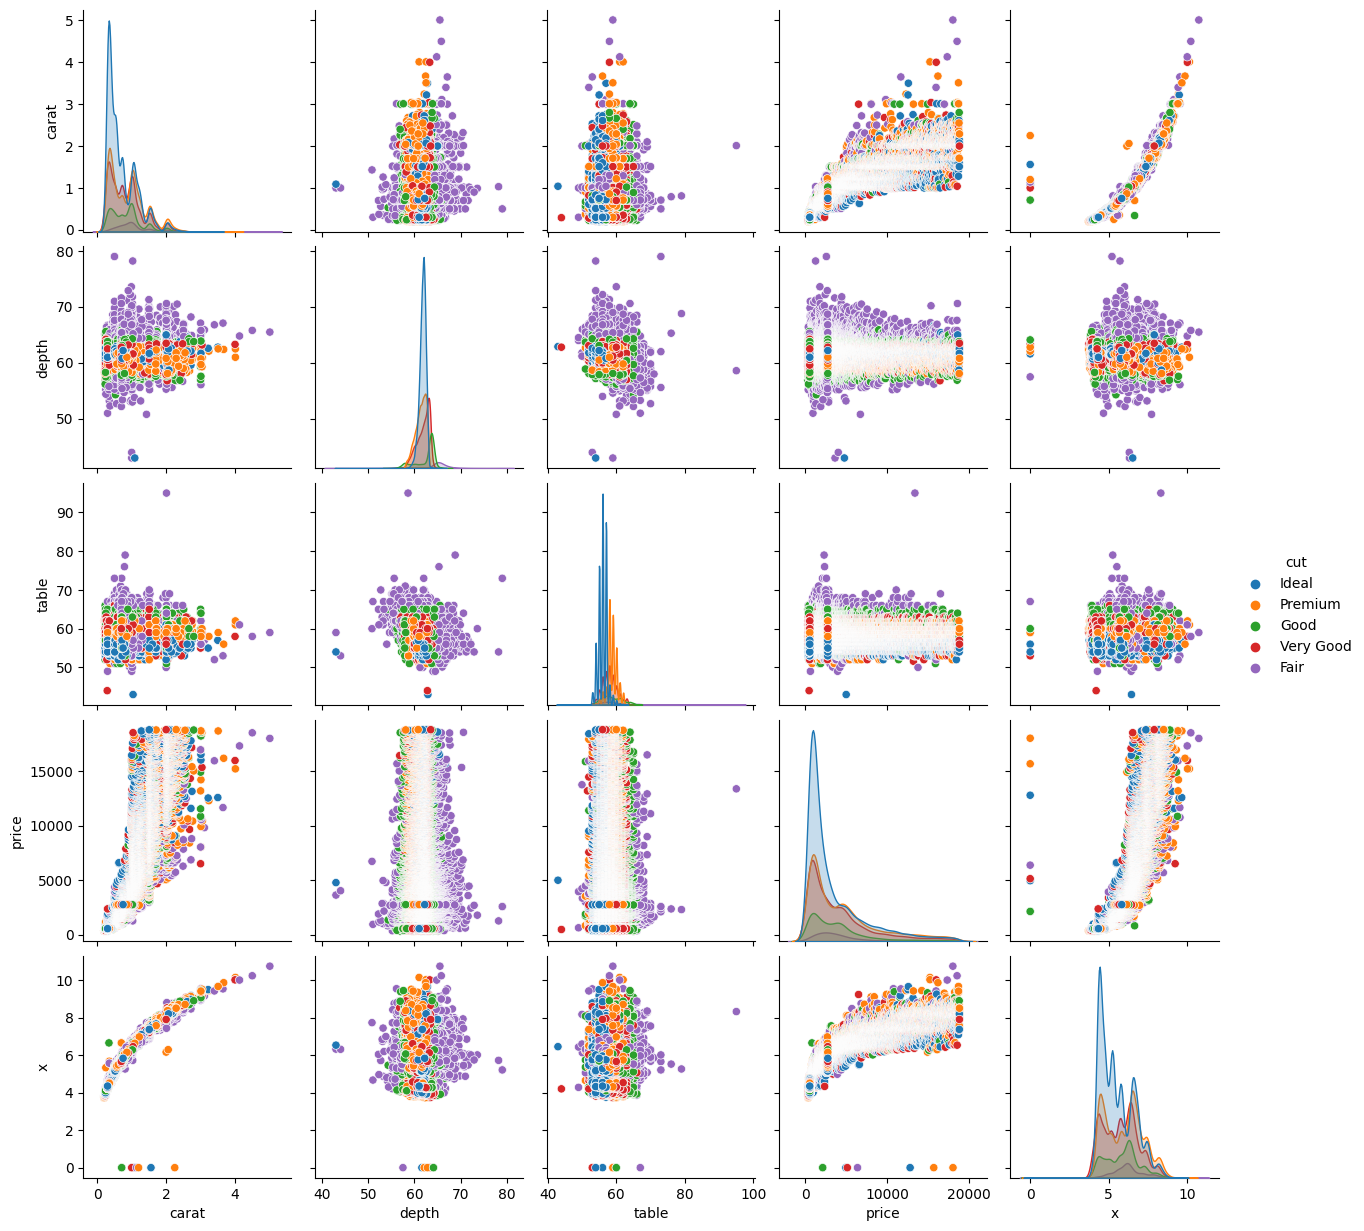

In [24]:
# mismo pairplot pero con la variable corte pinta en colores

sns.pairplot(diamantes_importancias,
             hue="cut")

EMPEZAMOS LOS MODELOS DE ML

In [25]:
#Preparar los datos

X = diamantes_importancias[['carat', 'depth', 'table', 'price', 'x']]
y = diamantes_importancias["cut"]

#Separar en grupos

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15691)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 5)
(10788, 5)
(43152,)
(10788,)


In [27]:
#Preparar un random forest

rnd_forest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=15691)
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=15691)

In [28]:
rnd_forest_predict = rnd_forest.predict(X_test)
matriz_conf_rnd = confusion_matrix(rnd_forest_predict, y_test)

matriz_conf_rnd

array([[ 263,   37,    2,    0,    1],
       [  28,  570,    4,    0,  107],
       [   6,   32, 4028,  327,  677],
       [  19,  166,  207, 2419, 1022],
       [   3,  197,   15,   35,  623]], dtype=int64)

<AxesSubplot:>

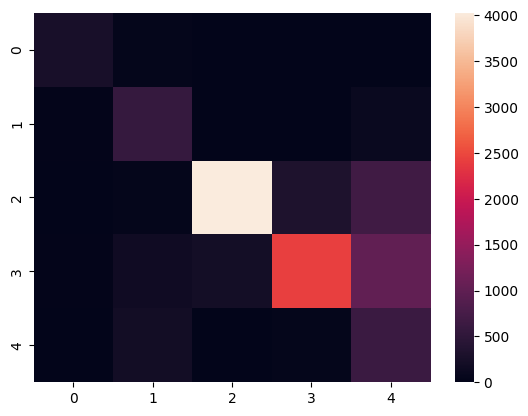

In [29]:
sns.heatmap(matriz_conf_rnd)

In [30]:
score_precision_rnd = accuracy_score(y_test, rnd_forest_predict)
print(score_precision_rnd)

clas_report_rnd = classification_report(y_test, rnd_forest_predict)
print(clas_report_rnd)

0.7325732295142752
              precision    recall  f1-score   support

        Fair       0.87      0.82      0.85       319
        Good       0.80      0.57      0.67      1002
       Ideal       0.79      0.95      0.86      4256
     Premium       0.63      0.87      0.73      2781
   Very Good       0.71      0.26      0.38      2430

    accuracy                           0.73     10788
   macro avg       0.76      0.69      0.70     10788
weighted avg       0.74      0.73      0.70     10788



In [52]:
#Preparar un ADABoost

adaBoost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                  n_estimators = 200,
                                  algorithm = "SAMME.R",
                                  learning_rate = 0.5,
                                  random_state=15691)
adaBoost_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=15691)

In [53]:
adaBoost_predict = adaBoost_clf.predict(X_test)
matriz_conf_adaBoost = confusion_matrix(adaBoost_predict, y_test)

matriz_conf_adaBoost

array([[ 123,   28,    1,    2,    9],
       [ 174,  351,    2,   32,  157],
       [   4,   22, 3935,  303,  620],
       [  12,  133,  196, 2334,  975],
       [   6,  468,  122,  110,  669]], dtype=int64)

<AxesSubplot:>

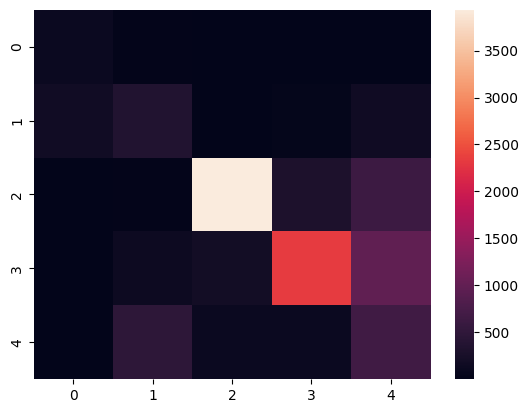

In [54]:
sns.heatmap(matriz_conf_adaBoost)

In [55]:
score_precision_adaBoost = accuracy_score(y_test, adaBoost_predict)
print(score_precision_adaBoost)

clas_report_adaBoost = classification_report(y_test, adaBoost_predict)
print(clas_report_adaBoost)

0.6870596959584724
              precision    recall  f1-score   support

        Fair       0.75      0.39      0.51       319
        Good       0.49      0.35      0.41      1002
       Ideal       0.81      0.92      0.86      4256
     Premium       0.64      0.84      0.73      2781
   Very Good       0.49      0.28      0.35      2430

    accuracy                           0.69     10788
   macro avg       0.64      0.56      0.57     10788
weighted avg       0.66      0.69      0.66     10788



Usando CrossValidation

In [35]:
rnd = RandomForestClassifier()

In [36]:
parameters = {"n_estimators": [100, 500, 1000],
              "criterion": ["gini", "entropy"],
              "max_depth": [2,3,4,5],
              "max_features": ["sqrt", "log2"]
              }

grid = GridSearchCV(estimator = rnd,
                   param_grid = parameters,
                    scoring = 'accuracy',
                    cv = 10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [37]:
print(grid.scorer_)
print(grid.best_params_)

make_scorer(accuracy_score)
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 1000}


In [38]:
rnd_forest_2 = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features="log2", random_state=15691)
rnd_forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=1000,
                       random_state=15691)

In [39]:
rnd_forest_predict_2 = rnd_forest_2.predict(X_test)
matriz_conf_rnd_2 = confusion_matrix(rnd_forest_predict_2, y_test)

matriz_conf_rnd_2

array([[ 263,   37,    2,    0,    1],
       [  28,  570,    4,    0,  107],
       [   6,   32, 4028,  327,  677],
       [  19,  166,  207, 2419, 1022],
       [   3,  197,   15,   35,  623]], dtype=int64)

In [40]:
score_precision_rnd_2 = accuracy_score(y_test, rnd_forest_predict_2)
print(score_precision_rnd_2)

clas_report_rnd_2 = classification_report(y_test, rnd_forest_predict_2)
print(clas_report_rnd_2)

0.7325732295142752
              precision    recall  f1-score   support

        Fair       0.87      0.82      0.85       319
        Good       0.80      0.57      0.67      1002
       Ideal       0.79      0.95      0.86      4256
     Premium       0.63      0.87      0.73      2781
   Very Good       0.71      0.26      0.38      2430

    accuracy                           0.73     10788
   macro avg       0.76      0.69      0.70     10788
weighted avg       0.74      0.73      0.70     10788



In [42]:
adaBoost_clf_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5))

parameters = {"n_estimators": [100, 500, 1000],
              "learning_rate": [1.0, 1.5, 2.0]
              }

grid2 = GridSearchCV(estimator = adaBoost_clf_2,
                   param_grid = parameters,
                    scoring = 'accuracy',
                    cv = 10)

grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5)),
             param_grid={'learning_rate': [1.0, 1.5, 2.0],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [43]:
print(grid2.scorer_)
print(grid2.best_params_)

make_scorer(accuracy_score)
{'learning_rate': 1.0, 'n_estimators': 1000}


In [44]:
adaBoost_clf_CV = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                                  n_estimators = 1000,
                                  learning_rate = 1.0,
                                  random_state=15691)
adaBoost_clf_CV.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=1000, random_state=15691)

In [45]:
adaBoost_predict_CV = adaBoost_clf_CV.predict(X_test)
matriz_conf_adaBoost_CV = confusion_matrix(adaBoost_predict_CV, y_test)

matriz_conf_adaBoost_CV

array([[ 199,   62,    1,    0,    3],
       [  89,  674,   27,   81,  376],
       [   8,   27, 2950,  415,  591],
       [   9,   56,  432, 1519,  545],
       [  14,  183,  846,  766,  915]], dtype=int64)

In [46]:
score_precision_adaBoost_CV = accuracy_score(y_test, adaBoost_predict_CV)
print(score_precision_adaBoost_CV)

clas_report_adaBoost_CV = classification_report(y_test, adaBoost_predict_CV)
print(clas_report_adaBoost_CV)

0.5799962921764924
              precision    recall  f1-score   support

        Fair       0.75      0.62      0.68       319
        Good       0.54      0.67      0.60      1002
       Ideal       0.74      0.69      0.72      4256
     Premium       0.59      0.55      0.57      2781
   Very Good       0.34      0.38      0.36      2430

    accuracy                           0.58     10788
   macro avg       0.59      0.58      0.58     10788
weighted avg       0.59      0.58      0.58     10788



In [47]:
#Salvar los mejores modelos

import pickle

with open('my_model_rnd_forest', 'wb') as archivo_salida:
    pickle.dump(grid.best_estimator_, archivo_salida)

with open('my_model_adaBoost', 'wb') as archivo_salida:
    pickle.dump(grid2.best_estimator_, archivo_salida)